In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data=pd.read_csv('/Users/antropravin/Desktop/Bezohminds/Task/Movie Recommendation System/all_movie_details.csv')
data.head(10)

,movie_id,title,overview,genres,release_date,runtime,cast,crew,original_language,poster_path,vote_average,vote_count,popularity,production_companies,keywords
0,447273,Snow White,A princess joins forces with seven dwarfs to l...,"Family, Fantasy",2025-03-19,109,NaN,NaN,en,https://image.tmdb.org/t/p/w500/xWWg47tTfparvj...,3.232,41,24.058,"Walt Disney Pictures, Marc Platt Productions",NaN
1,1437446,The Twister: Caught in the Storm,"In May 2011, a massive tornado ripped through ...",Documentary,2025-03-18,89,NaN,NaN,en,https://image.tmdb.org/t/p/w500/ggXb37lX9gW4SR...,6.900,8,15.751,RAW,NaN
2,1204967,USAH: Uncommon Stories of American Horror,27 real-life stories of American horror are to...,Documentary,2025-03-18,0,NaN,NaN,en,https://image.tmdb.org/t/p/w500/FDGnXfWwRJETNa...,0.000,0,13.571,NaN,NaN
3,675776,Persona,An Actress finds herself in a complex puzzle o...,"Thriller, Horror",2025-03-18,0,NaN,NaN,en,https://image.tmdb.org/t/p/w500None,0.000,0,13.556,Volitional Visions,NaN
4,696506,Mickey 17,Unlikely hero Mickey Barnes finds himself in t...,"Science Fiction, Comedy, Adventure",2025-02-28,137,NaN,NaN,en,https://image.tmdb.org/t/p/w500/edKpE9B5qN3e55...,6.980,786,22.567,"Warner Bros. Pictures, Plan B Entertainment, O...",NaN
5,1437920,Centered: Joe Lieberman,"In a time of deep political division, Centered...",Documentary,2025-03-18,77,NaN,NaN,en,https://image.tmdb.org/t/p/w500/pGeRaZEmOo46Dh...,7.833,3,22.509,"Hidden Light Institute, Black Eye Productions",NaN
6,1437701,Leaving Neverland 2: Surviving Michael Jackson,Explores the personal toll on James Safechuck ...,Documentary,2025-03-18,54,NaN,NaN,en,https://image.tmdb.org/t/p/w500/wPmKY6KaLj3PEP...,5.250,4,22.508,"Amos Pictures, Sphere Abacus (GB)",NaN
7,1417181,Dawn of Impressionism: Paris 1874,The Impressionists are the most popular group ...,Documentary,2025-03-18,92,NaN,NaN,en,https://image.tmdb.org/t/p/w500/lSU85MrxOtlrvt...,4.000,2,13.549,"Seventh Art Productions, Exhibition on Screen ...",NaN
8,1439804,Spider in the Cupboard,"SMILE, YOU'RE ON CAMERA...\r Jen is a crisis h...","Horror, Thriller",2025-03-18,20,NaN,NaN,en,https://image.tmdb.org/t/p/w500/9lKBcNmWdSbODD...,4.000,2,13.532,Area JB Entertainment,NaN
9,1436099,Act of Kindness,A young woman living in her car has her life t...,Thriller,2025-03-18,15,NaN,NaN,en,https://image.tmdb.org/t/p/w500/jC9eJYTxvREpBe...,3.833,3,14.311,deadtime media,NaN


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   overview              9902 non-null   object 
 3   genres                9880 non-null   object 
 4   release_date          10000 non-null  object 
 5   runtime               10000 non-null  int64  
 6   cast                  0 non-null      float64
 7   crew                  0 non-null      float64
 8   original_language     10000 non-null  object 
 9   poster_path           10000 non-null  object 
 10  vote_average          10000 non-null  float64
 11  vote_count            10000 non-null  int64  
 12  popularity            10000 non-null  float64
 13  production_companies  9657 non-null   object 
 14  keywords              0 non-null      float64
dtypes: float64(5), int64

In [79]:
data.isnull().sum()

movie_id                    0
title                       0
overview                   98
genres                    120
release_date                0
runtime                     0
cast                    10000
crew                    10000
original_language           0
poster_path                 0
vote_average                0
vote_count                  0
popularity                  0
production_companies      343
keywords                10000
dtype: int64

In [80]:
data=data.drop(columns=['cast'])
data=data.drop(columns=['crew'])
data=data.drop(columns=['keywords'])

In [81]:
data['production_companies'] = data['production_companies'].fillna('Not Available')
data['overview']=data['overview'].fillna('Not Available')
data=data.dropna(axis=0,subset=['genres'])
data['release_date']=pd.to_datetime(data['release_date'])
data['release_year']=pd.to_datetime(data['release_date']).dt.year
release_year_column=data.pop('release_year')
data.insert(5,'release_year',release_year_column)

In [82]:
data.isnull().sum()

movie_id                0
title                   0
overview                0
genres                  0
release_date            0
release_year            0
runtime                 0
original_language       0
poster_path             0
vote_average            0
vote_count              0
popularity              0
production_companies    0
dtype: int64

In [83]:
data.head(10)

,movie_id,title,overview,genres,release_date,release_year,runtime,original_language,poster_path,vote_average,vote_count,popularity,production_companies
0,447273,Snow White,A princess joins forces with seven dwarfs to l...,"Family, Fantasy",2025-03-19,2025,109,en,https://image.tmdb.org/t/p/w500/xWWg47tTfparvj...,3.232,41,24.058,"Walt Disney Pictures, Marc Platt Productions"
1,1437446,The Twister: Caught in the Storm,"In May 2011, a massive tornado ripped through ...",Documentary,2025-03-18,2025,89,en,https://image.tmdb.org/t/p/w500/ggXb37lX9gW4SR...,6.900,8,15.751,RAW
2,1204967,USAH: Uncommon Stories of American Horror,27 real-life stories of American horror are to...,Documentary,2025-03-18,2025,0,en,https://image.tmdb.org/t/p/w500/FDGnXfWwRJETNa...,0.000,0,13.571,Not Available
3,675776,Persona,An Actress finds herself in a complex puzzle o...,"Thriller, Horror",2025-03-18,2025,0,en,https://image.tmdb.org/t/p/w500None,0.000,0,13.556,Volitional Visions
4,696506,Mickey 17,Unlikely hero Mickey Barnes finds himself in t...,"Science Fiction, Comedy, Adventure",2025-02-28,2025,137,en,https://image.tmdb.org/t/p/w500/edKpE9B5qN3e55...,6.980,786,22.567,"Warner Bros. Pictures, Plan B Entertainment, O..."
5,1437920,Centered: Joe Lieberman,"In a time of deep political division, Centered...",Documentary,2025-03-18,2025,77,en,https://image.tmdb.org/t/p/w500/pGeRaZEmOo46Dh...,7.833,3,22.509,"Hidden Light Institute, Black Eye Productions"
6,1437701,Leaving Neverland 2: Surviving Michael Jackson,Explores the personal toll on James Safechuck ...,Documentary,2025-03-18,2025,54,en,https://image.tmdb.org/t/p/w500/wPmKY6KaLj3PEP...,5.250,4,22.508,"Amos Pictures, Sphere Abacus (GB)"
7,1417181,Dawn of Impressionism: Paris 1874,The Impressionists are the most popular group ...,Documentary,2025-03-18,2025,92,en,https://image.tmdb.org/t/p/w500/lSU85MrxOtlrvt...,4.000,2,13.549,"Seventh Art Productions, Exhibition on Screen ..."
8,1439804,Spider in the Cupboard,"SMILE, YOU'RE ON CAMERA...\r Jen is a crisis h...","Horror, Thriller",2025-03-18,2025,20,en,https://image.tmdb.org/t/p/w500/9lKBcNmWdSbODD...,4.000,2,13.532,Area JB Entertainment
9,1436099,Act of Kindness,A young woman living in her car has her life t...,Thriller,2025-03-18,2025,15,en,https://image.tmdb.org/t/p/w500/jC9eJYTxvREpBe...,3.833,3,14.311,deadtime media


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9880 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_id              9880 non-null   int64         
 1   title                 9880 non-null   object        
 2   overview              9880 non-null   object        
 3   genres                9880 non-null   object        
 4   release_date          9880 non-null   datetime64[ns]
 5   release_year          9880 non-null   int64         
 6   runtime               9880 non-null   int64         
 7   original_language     9880 non-null   object        
 8   poster_path           9880 non-null   object        
 9   vote_average          9880 non-null   float64       
 10  vote_count            9880 non-null   int64         
 11  popularity            9880 non-null   float64       
 12  production_companies  9880 non-null   object        
dtypes: datetime64[ns](

In [84]:
data.to_csv('Cleaned Movie Data.csv')
print("Cleaned Movie data is saved Successfully")

Cleaned Movie data is saved Successfully


Data Visualizations

In [86]:
data=pd.read_csv('/Users/antropravin/Desktop/Bezohminds/Task/Movie Recommendation System/Cleaned Movie Data.csv')

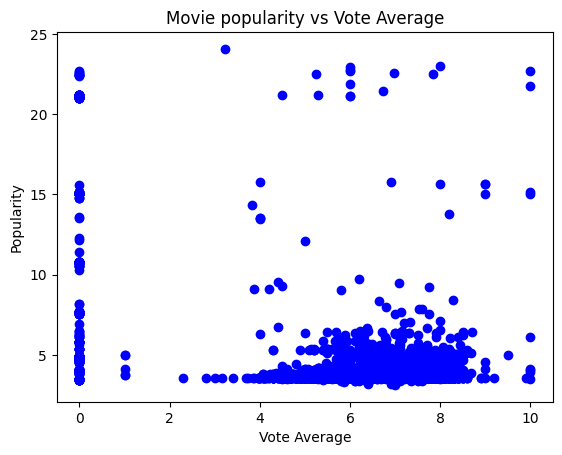

In [96]:
x=data['vote_average']
y=data['popularity']
plt.scatter(x, y, color='blue')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title("Movie popularity vs Vote Average")
plt.show()

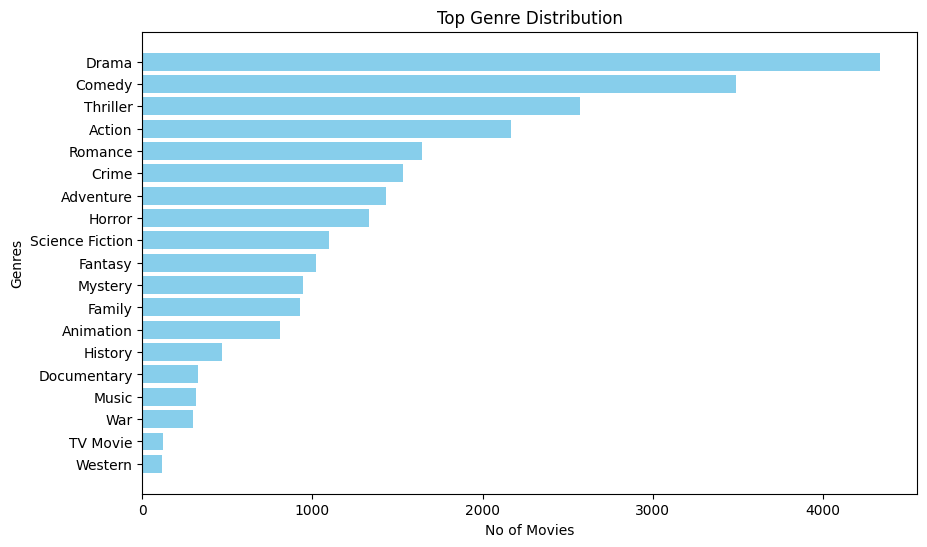

In [110]:
all_geners=[genre.strip() for genres in data['genres'] for genre in genres.split(',')]
genre_count=Counter(all_geners)
genre_data=pd.DataFrame(genre_count.items(), columns=['Genre',"Count"]).sort_values(by='Count',ascending=True)
plt.figure(figsize=(10,6))
plt.barh(genre_data['Genre'],genre_data['Count'],color='skyblue')
plt.xlabel("No of Movies")
plt.ylabel("Genres")
plt.title("Top Genre Distribution")
plt.show()

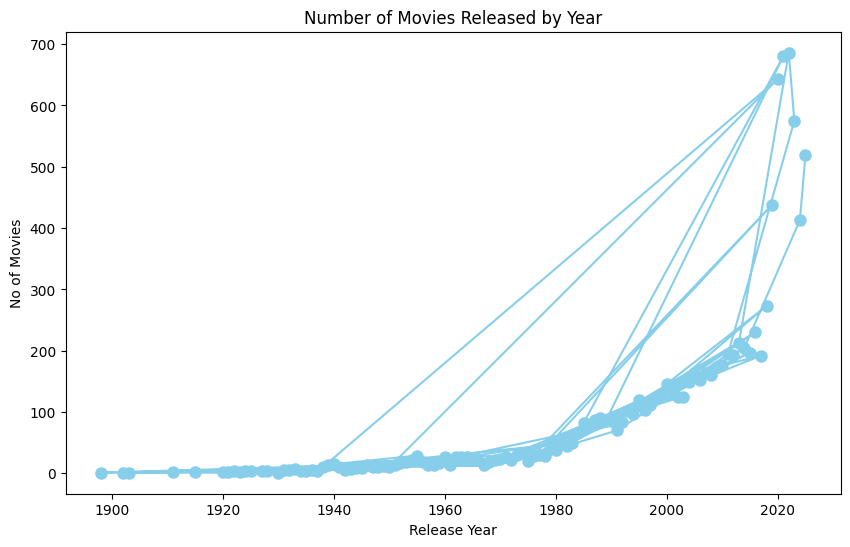

In [126]:
x=data['release_year']
y=Counter(x)
years=list(y.keys())
counts=list(y.values())
plt.figure(figsize=(10, 6))
plt.plot(years,counts, marker='o', color='skyblue', linestyle='-', markersize=8)
plt.xlabel("Release Year")
plt.ylabel("No of Movies")
plt.title("Number of Movies Released by Year")
plt.show()

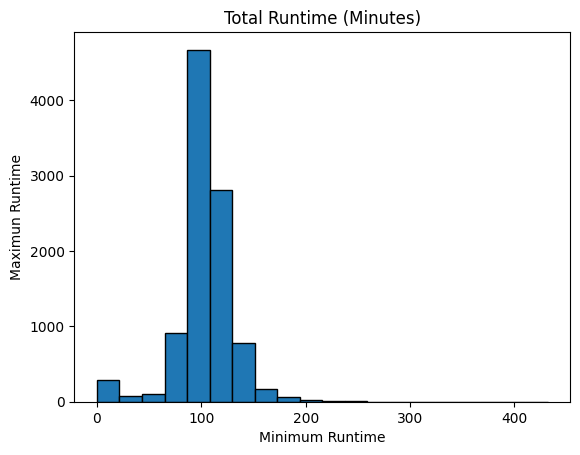

In [128]:
plt.hist(data['runtime'], bins=20, edgecolor='black')
plt.xlabel('Minimum Runtime')
plt.ylabel('Maximun Runtime')
plt.title('Total Runtime (Minutes)')
plt.show()

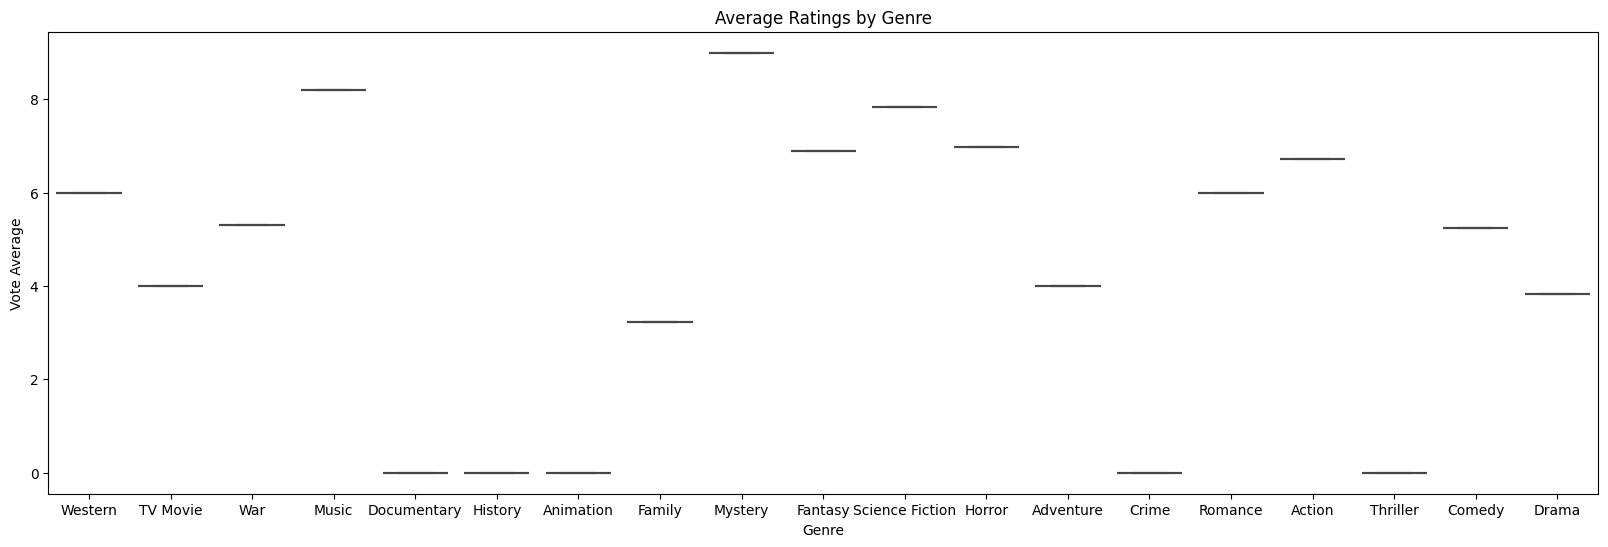

In [136]:
plt.figure(figsize=(20,6))
sns.boxplot(x=genre_data['Genre'],y='vote_average',data=data)
plt.xlabel('Genre')
plt.ylabel('Vote Average')
plt.title('Average Ratings by Genre')
plt.show()

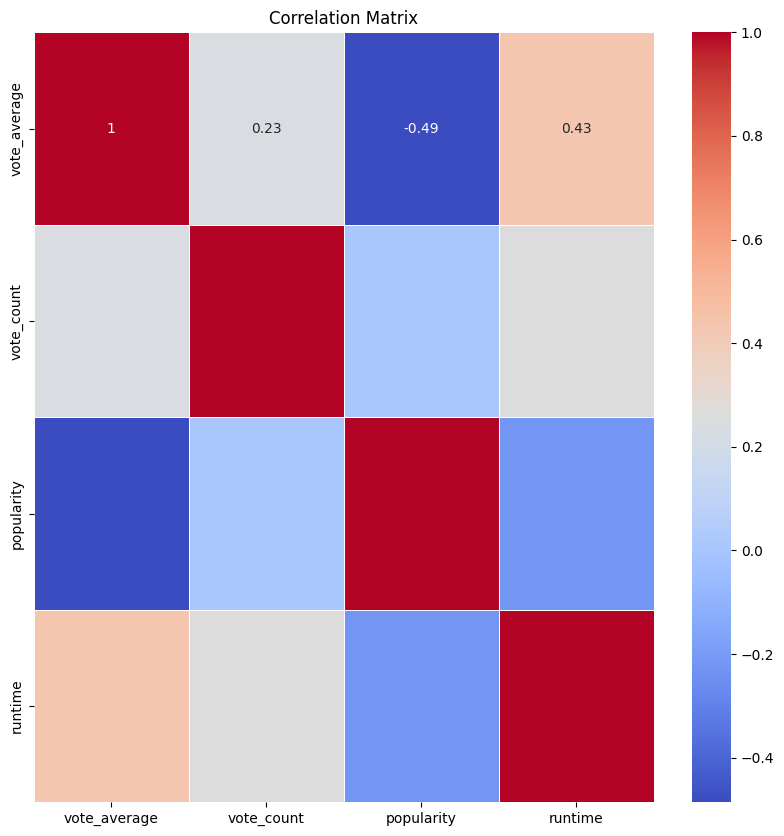

In [146]:
corr_col = data[['vote_average', 'vote_count', 'popularity', 'runtime']]
corr_matrix = corr_col.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Filter the movies where 'original_language' is 'fr' (French language)
french_movies = data[data['original_language'] == 'te']

# Display the first few rows of the French movies
print(french_movies.head())
french_movies.to_csv('french_movies.csv', index=False)

     Unnamed: 0  movie_id               title  \
225         284   1439367             Asthram   
429         507   1291321         Sweet Heart   
461         541   1416501                 DNA   
484         566   1422471              Dexter   
501         590   1443002  Maadan Kodai Vizha   

                                              overview  \
225  Asthram is a gripping crime thriller that delv...   
429  Vasu, a gifted animator with a troubled past, ...   
461                                      Not Available   
484  Aadi and Yamini's love story takes a tragic tu...   
501  Determined to revive a long-forgotten traditio...   

                     genres release_date  release_year  runtime  \
225                Thriller   2025-03-21          2025      111   
429  Romance, Comedy, Drama   2025-03-14          2025        0   
461                   Drama   2025-03-14          2025        0   
484                Thriller   2025-03-14          2025        0   
501                  

In [7]:
movies_df = pd.read_csv('/Users/antropravin/Desktop/Bezohminds/Task/Movie Recommendation System/Cleaned Movie Data.csv')
users_df = pd.read_csv('/Users/antropravin/Desktop/Bezohminds/Task/Movie Recommendation System/User_Profiles.csv')

In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9880 entries, 0 to 9879
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9880 non-null   int64  
 1   movie_id              9880 non-null   int64  
 2   title                 9880 non-null   object 
 3   overview              9880 non-null   object 
 4   genres                9880 non-null   object 
 5   release_date          9880 non-null   object 
 6   release_year          9880 non-null   int64  
 7   runtime               9880 non-null   int64  
 8   original_language     9880 non-null   object 
 9   poster_path           9880 non-null   object 
 10  vote_average          9880 non-null   float64
 11  vote_count            9880 non-null   int64  
 12  popularity            9880 non-null   float64
 13  production_companies  9880 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   5000 non-null   int64 
 1   watched_movies            5000 non-null   object
 2   liked_movies              5000 non-null   object
 3   disliked_movies           5000 non-null   object
 4   liked_genres              5000 non-null   object
 5   disliked_genres           5000 non-null   object
 6   language_preferred        5000 non-null   object
 7   watch_timestamps          5000 non-null   object
 8   user_ratings              5000 non-null   object
 9   viewing_frequency         5000 non-null   object
 10  fav_production_companies  4987 non-null   object
dtypes: int64(1), object(10)
memory usage: 429.8+ KB
